In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

ModuleNotFoundError: No module named 'jupyter_black'

In [1]:
import pandas as pd

data = pd.read_csv("data/toxic_companys_brasil.csv")

### Data Analysis

### Process Data

In [2]:
data = data.fillna("")

In [3]:
data.shape

(2089, 5)

In [4]:
data["Reason"] = data["Reason"].apply(str)
data = data[data["Reason"].apply(lambda x: len(x.split(" ")) > 5)]
documents = data["Reason"].tolist()

In [19]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/letrus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

SEED = 42
# remove some 
vectorizer_model = CountVectorizer(
    stop_words=stopwords.words("portuguese") + stopwords.words("english") + ["pra", "nada","cu", "dá","todo","tudo", "embora","pessoa", "ter", "vc", "vai", "fica"]
)
cluster_model = KMeans(n_clusters=10, random_state=SEED)

topic_model = BERTopic(
    hdbscan_model=cluster_model,
    top_n_words=4,
    language="portuguese",
    vectorizer_model=vectorizer_model,
)

In [21]:
topics, probs = topic_model.fit_transform(documents)

In [22]:
topics

[2,
 4,
 3,
 1,
 0,
 2,
 5,
 6,
 4,
 3,
 5,
 4,
 4,
 1,
 4,
 0,
 1,
 3,
 3,
 2,
 6,
 4,
 3,
 7,
 0,
 3,
 3,
 5,
 3,
 8,
 7,
 2,
 4,
 8,
 0,
 1,
 3,
 5,
 8,
 1,
 4,
 3,
 3,
 8,
 5,
 0,
 9,
 1,
 4,
 0,
 1,
 6,
 0,
 4,
 3,
 5,
 2,
 2,
 4,
 4,
 3,
 1,
 1,
 3,
 2,
 1,
 4,
 2,
 4,
 7,
 2,
 6,
 0,
 5,
 3,
 6,
 5,
 1,
 0,
 1,
 5,
 6,
 0,
 1,
 6,
 5,
 2,
 4,
 5,
 6,
 3,
 5,
 0,
 4,
 5,
 8,
 7,
 6,
 4,
 5,
 7,
 3,
 1,
 3,
 6,
 0,
 0,
 5,
 5,
 6,
 5,
 3,
 1,
 2,
 7,
 0,
 0,
 5,
 0,
 7,
 0,
 3,
 4,
 3,
 6,
 2,
 1,
 2,
 2,
 1,
 7,
 4,
 2,
 2,
 1,
 8,
 3,
 0,
 1,
 2,
 2,
 2,
 1,
 7,
 0,
 1,
 5,
 2,
 4,
 1,
 3,
 0,
 2,
 0,
 6,
 9,
 8,
 0,
 0,
 2,
 0,
 4,
 8,
 8,
 3,
 0,
 2,
 2,
 1,
 4,
 1,
 0,
 3,
 3,
 2,
 4,
 1,
 4,
 0,
 1,
 6,
 0,
 0,
 0,
 4,
 5,
 0,
 1,
 0,
 1,
 4,
 2,
 6,
 3,
 7,
 3,
 3,
 1,
 8,
 4,
 8,
 1,
 0,
 8,
 0,
 6,
 0,
 6,
 2,
 8,
 0,
 0,
 7,
 1,
 1,
 3,
 1,
 4,
 7,
 2,
 2,
 4,
 0,
 0,
 6,
 3,
 0,
 3,
 3,
 6,
 7,
 7,
 7,
 7,
 7,
 4,
 5,
 7,
 2,
 5,
 5,
 7,
 4,
 2,
 0,
 7,
 7,
 7,
 5,
 0,


In [23]:
%matplotlib inline
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'empresa | ambiente | funcionários | pessoas', 297],
                                   [1, 'falta | empresa | gestão | trabalho', 251],
                                   [2, 'empresa | liderança | ceo | pessoas', 249],
                                   [3, 'salário | empresa | abaixo | pj', 227],
                                   [4, 'assédio | moral | funcionários | mulheres', 207],
                                   [5, 'horas | trabalhar | trabalho | hora', 180],
                                   [6, 'tóxica | tóxico | ambiente | cultura', 159],
                                   [7, 'empresa | funcionários | dono | chefe', 146],
                                   [8, 'empresa | trabalhei | após | rh', 117],
                                   [9, 'varias | gestor | postura | ficou', 18]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([297, 251, 249, 227, 207, 180, 159, 146, 117,  18]),
                         'sizemode': 'area',
                         'sizeref': 0.185625,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([  9.81463 ,  11.055203,  10.570623, -14.62374 ,   9.375919, -14.890277,
                            9.577081,   9.059328,   9.197735,   9.682223], dtype=float32),
              'xaxis': 'x',
              'y': array([ -0.5198117 ,  -0.8750201 ,  -0.60690117, -12.379192  ,  -1.9307873 ,
                          -12.645727  ,  -1.4358026 ,   1.4225804 ,   0.86241263,   1.4330989 ],
                         dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': -17.12381844520569,
                                'y': -6.447261241078377,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': -2.2051672458648683,
                                'xshift': 10,
                                'y': 1.648063749074936}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': -2.2051672458648683,
                           'x1': -2.2051672458648683,
                           'y0': -14.54258623123169,
                           'y1': 1.648063749074936},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': -17.12381844520569,
                           'x1': 12.713483953475953,
                           'y0': -6.447261241078377,
                           'y1': -6.447261241078377}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                              

In [24]:
%matplotlib inline
topic_model.visualize_heatmap()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_empresa_ambiente_funcioná..., 1_falta_empresa_gestão,
                    2_empresa_liderança_ceo, 3_salário_empresa_abaixo,
                    4_assédio_moral_funcionários, 5_horas_trabalhar_trabalho,
                    6_tóxica_tóxico_ambiente, 7_empresa_funcionários_dono,
                    8_empresa_trabalhei_após, 9_varias_gestor_postura],
              'xaxis': 'x',
              'y': [0_empresa_ambiente_funcioná..., 1_falta_empresa_gestão,
                    2_empresa_liderança_ceo, 3_salário_empresa_abaixo,
                    4_assédio_moral_funcionários, 5_horas_trabalhar_trabalho,
                    6_tóxica_tóxico_ambiente, 7_empresa_funcionários_dono,
                    8_empresa_trabalhei_após, 9_varias_gestor_postura],
              'yaxis': 'y',
              'z': array([[0.9999998 , 0.87963367, 0.9068533 , 0.83305275, 0.8250172 ,
                           0.7696347 , 0.8398551 , 0.8361169 , 0.69145054, 0.3509516 ],
                          [0.87963367, 0.9999998 , 0.89290875, 0.8650015 , 0.7854364 ,
                           0.7990091 , 0.78875184, 0.7520374 , 0.75072944, 0.27172145],
                          [0.9068533 , 0.89290875, 0.9999994 , 0.83435464, 0.8158017 ,
                           0.7438706 , 0.7466481 , 0.8280904 , 0.7555738 , 0.29961607],
                          [0.83305275, 0.8650015 , 0.83435464, 0.99999964, 0.7148649 ,
                           0.87253773, 0.69472516, 0.7997809 , 0.7369748 , 0.2543398 ],
                          [0.8250172 , 0.7854364 , 0.8158017 , 0.7148649 , 1.0000004 ,
                           0.6508145 , 0.83945316, 0.76745975, 0.7040523 , 0.24421947],
                          [0.7696347 , 0.7990091 , 0.7438706 , 0.87253773, 0.6508145 ,
                           0.99999946, 0.66970485, 0.80636585, 0.7521723 , 0.27194238],
                          [0.8398551 , 0.78875184, 0.7466481 , 0.69472516, 0.83945316,
                           0.66970485, 0.9999999 , 0.7286655 , 0.6356941 , 0.30272263],
                          [0.8361169 , 0.7520374 , 0.8280904 , 0.7997809 , 0.76745975,
                           0.80636585, 0.7286655 , 1.0000001 , 0.7888078 , 0.4004955 ],
                          [0.69145054, 0.75072944, 0.7555738 , 0.7369748 , 0.7040523 ,
                           0.7521723 , 0.6356941 , 0.7888078 , 0.9999997 , 0.17805824],
                          [0.3509516 , 0.27172145, 0.29961607, 0.2543398 , 0.24421947,
                           0.27194238, 0.30272263, 0.4004955 , 0.17805824, 0.9999998 ]],
                         dtype=float32)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 800,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanc

In [25]:
topics_words_list = []
for topic in topics:
    topics_words_list.append(topic_model.get_topic(topic))

In [26]:
topics_words = []
for i in topic_model.get_topics():
    words = topic_model.get_topic(i)
    words_string = ", ".join([w[0] for w in words[:10]])
    topics_words.append(words_string)

In [27]:
topics_words

['empresa, ambiente, funcionários, pessoas',
 'falta, empresa, gestão, trabalho',
 'empresa, liderança, ceo, pessoas',
 'salário, empresa, abaixo, pj',
 'assédio, moral, funcionários, mulheres',
 'horas, trabalhar, trabalho, hora',
 'tóxica, tóxico, ambiente, cultura',
 'empresa, funcionários, dono, chefe',
 'empresa, trabalhei, após, rh',
 'varias, gestor, postura, ficou']

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

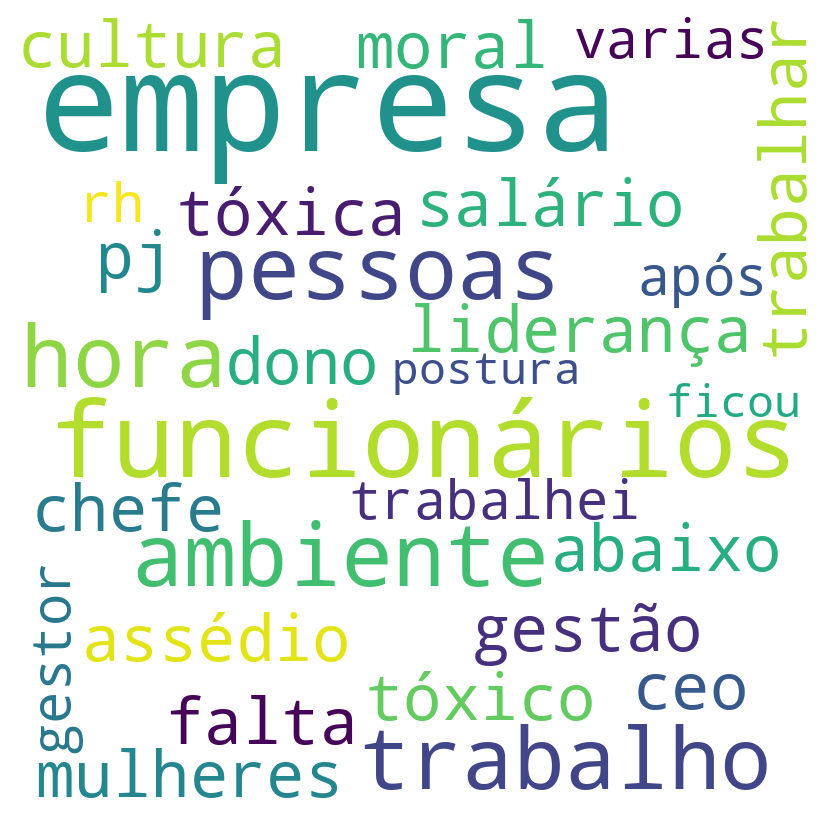

In [29]:
text = ", ".join(topics_words)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = [], 
                min_font_size = 10).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()